In [2]:
import pandas as pd
df = pd.read_csv('Book1.csv')
df.head()

,Text,Target
0,reserve bank forming expert committee based in...,Blockchain
1,director could play role financial system,Blockchain
2,preliminary discuss secure transaction study r...,Blockchain
3,security indeed prove essential transforming f...,Blockchain
4,bank settlement normally take three days based...,Blockchain


In [4]:
df['Target'].value_counts()

FinTech             8551
Cyber Security      2640
Bigdata             2267
Reg Tech            2206
credit reporting    1748
Blockchain          1375
Neobanks            1069
Microservices        977
Stock Trading        787
Robo Advising        737
Data Security        347
Name: Target, dtype: int64

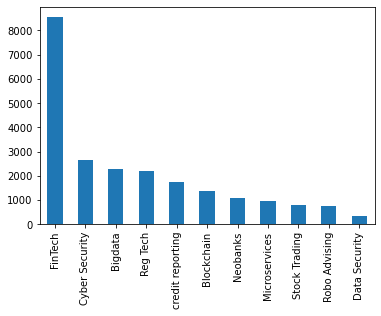

In [3]:
import matplotlib.pyplot as plt
target=df['Target'].value_counts()
target.plot.bar()

In [4]:
df.Text.duplicated().sum()

1717

In [5]:
df=df[pd.notnull(df['Text'])]

In [6]:
df.shape

(22701, 2)

In [7]:
df.Text.duplicated().sum()

1715

In [8]:
df.drop_duplicates(keep='first',inplace=True)

In [9]:
df.shape

(21103, 2)

In [26]:
df['category_id'] = df['Target'].factorize()[0]
category_id_df = df[['Target', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Target']].values)

In [27]:
df.head()

,Text,Target,category_id
0,reserve bank forming expert committee based in...,Blockchain,0
1,director could play role financial system,Blockchain,0
2,preliminary discuss secure transaction study r...,Blockchain,0
3,security indeed prove essential transforming f...,Blockchain,0
4,bank settlement normally take three days based...,Blockchain,0


In [12]:
df.tail()

,Text,Target,category_id
22699,fourth study discusses blockchain technology e...,Reg Tech,10
22700,book finishes stating biggest issue emerging F...,Reg Tech,10
22701,people culture cess,Reg Tech,10
22702,author challenges execu tive lead change stop ...,Reg Tech,10
22703,change data driven culture come bottom must start,Reg Tech,10


In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df['Text'],df['Target'],random_state=44)

In [14]:
X_train.shape,X_test.shape

((15827,), (5276,))

In [15]:
y_train.shape,y_test.shape

((15827,), (5276,))

In [20]:
from imblearn.oversampling import SMOTE

ModuleNotFoundError: No module named 'imblearn'

In [26]:
!pip install imblearn --user

In [36]:
!pip install imblearn

In [32]:
conda install -c conda-forge imbalanced-learn

Note: you may need to restart the kernel to use updated packages.
Solving environment: ...working... done

# All requested packages already installed.




In [37]:
pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in c:\users\jymeh\appdata\roaming\python\python38\site-packages (0.8.0)
Note: you may need to restart the kernel to use updated packages.


In [16]:
from imblearn.over_sampling import SMOTE

In [18]:
smote=SMOTE('minority')
X_sm,y_sm=smote.fit_resample(X_train,y_train)

ValueError: could not convert string to float: 'hate infrastructure distinctive advantage tomorrow said banking executive york summer human factor become differentiator'

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(X_train.values.ravel())
X_train=vectorizer.transform(X_train.values.ravel())
X_test=vectorizer.transform(X_test.values.ravel())
X_train=X_train.toarray()
X_test=X_test.toarray()

In [20]:
smote=SMOTE('minority')
X_sm,y_sm=smote.fit_resample(X_train,y_train)

C:\Users\jymeh\AppData\Roaming\Python\Python38\site-packages\imblearn\utils\_validation.py:587: FutureWarning: Pass sampling_strategy=minority as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


In [23]:
X_sm.shape,y_sm.shape

((21902, 10231), (21902,))

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df.Text).toarray()
labels = df.category_id
features.shape

(21103, 5999)

In [28]:
from sklearn.feature_selection import chi2
import numpy as np
N = 2
for Target, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(Target))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'Bigdata':
  . Most correlated unigrams:
. april
. data
  . Most correlated bigrams:
. data analysis
. data sets
# 'Blockchain':
  . Most correlated unigrams:
. chit
. permissioned
  . Most correlated bigrams:
. draft discussion
. paper strategy
# 'Cyber Security':
  . Most correlated unigrams:
. sandbox
. security
  . Most correlated bigrams:
. information security
. security digital
# 'Data Security':
  . Most correlated unigrams:
. privacy
. protection
  . Most correlated bigrams:
. personal data
. data protection
# 'FinTech':
  . Most correlated unigrams:
. start
. data
  . Most correlated bigrams:
. financial advisory
. advisory group
# 'Microservices':
  . Most correlated unigrams:
. application
. architecture
  . Most correlated bigrams:
. cloud native
. architectural style
# 'Neobanks':
  . Most correlated unigrams:
. valuation
. starling
  . Most correlated bigrams:
. sanction scanner
. starling bank
# 'Reg Tech':
  . Most correlated unigrams:
. regulators
. regtech
  . Most

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Target'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [31]:
print(clf.predict(count_vect.transform(["agarwal head bank"])))

['FinTech']


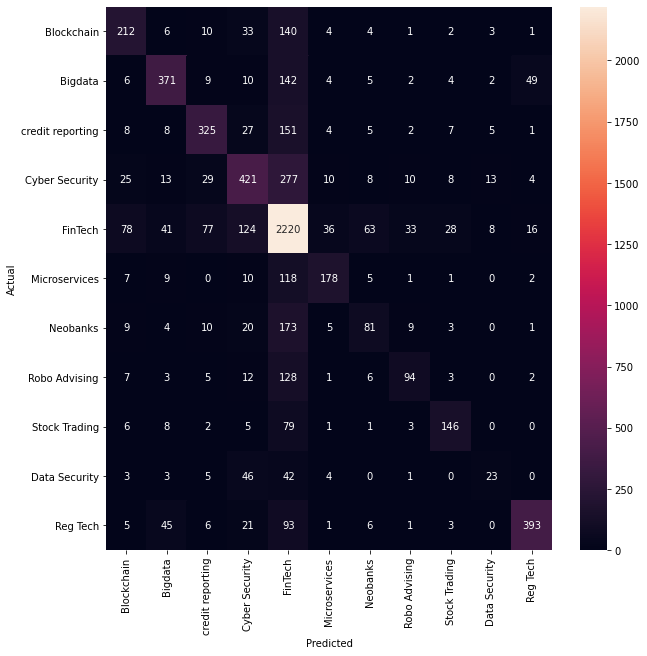

In [37]:
from sklearn.svm import LinearSVC
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Target.values, yticklabels=category_id_df.Target.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [38]:
smote=SMOTE('minority')
X_sm,y_sm=smote.fit_resample(X_train,y_train)

C:\Users\jymeh\AppData\Roaming\Python\Python38\site-packages\imblearn\utils\_validation.py:587: FutureWarning: Pass sampling_strategy=minority as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


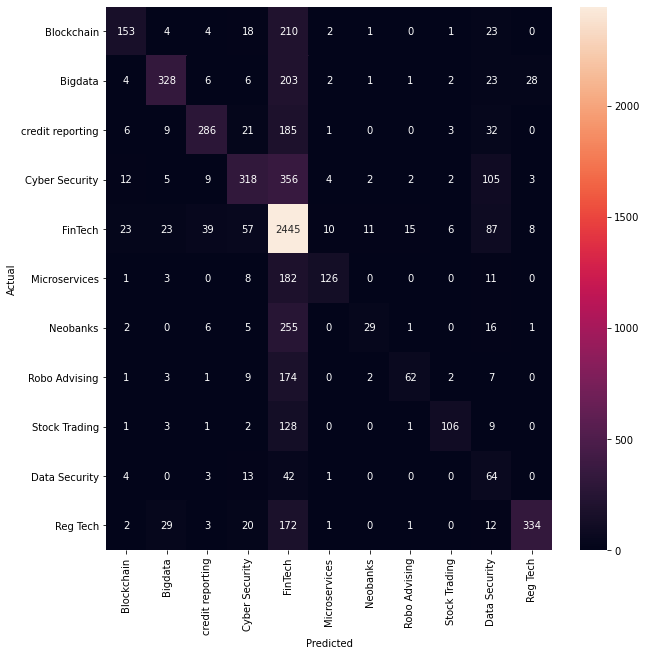

In [56]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42,max_iter=2000 )
model.fit(X_sm, y_sm)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Target.values, yticklabels=category_id_df.Target.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [41]:
#accuracy increased than before

In [43]:
#class weight

In [67]:
from sklearn.utils import class_weight
class_wei=class_weight.compute_class_weight('balanced',np.unique(y_train),y_train)

C:\Users\jymeh\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass classes=[ 0  1  2  3  4  5  6  7  8  9 10], y=3553      1
13835     4
1149      0
11823     4
3364      1
         ..
14067     4
20778    10
10731     4
11697     4
3054      1
Name: category_id, Length: 14139, dtype: int64 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [71]:
num_epochs=10
batch=128
history=model.fit(X_sm,y_sm,class_weight=class_wei,batch_size=batch)

TypeError: fit() got an unexpected keyword argument 'class_we'

In [73]:
class_wei=list(class_weight.compute_class_weight('balanced',np.unique(df['Target']),df['Target']))

C:\Users\jymeh\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass classes=['Bigdata' 'Blockchain' 'Cyber Security' 'Data Security' 'FinTech'
 'Microservices' 'Neobanks' 'Reg Tech' 'Robo Advising' 'Stock Trading'
 'credit reporting'], y=0        Blockchain
1        Blockchain
2        Blockchain
3        Blockchain
4        Blockchain
            ...    
22699      Reg Tech
22700      Reg Tech
22701      Reg Tech
22702      Reg Tech
22703      Reg Tech
Name: Target, Length: 21103, dtype: object as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [74]:
class_wei.sort()

In [75]:
class_wei

[0.2296450257905848,
 0.7760738452486026,
 1.0705661525974026,
 1.1063751703890112,
 1.1529173951048952,
 1.448983795660533,
 1.9839240387327255,
 2.040909090909091,
 2.4658798784762794,
 2.624424822783236,
 5.528687450877652]

In [77]:
weights={}
for index,weight in enumerate(class_wei):
    weights[index]=weight

In [78]:
weights

{0: 0.2296450257905848,
 1: 0.7760738452486026,
 2: 1.0705661525974026,
 3: 1.1063751703890112,
 4: 1.1529173951048952,
 5: 1.448983795660533,
 6: 1.9839240387327255,
 7: 2.040909090909091,
 8: 2.4658798784762794,
 9: 2.624424822783236,
 10: 5.528687450877652}

In [79]:
class_wei

[0.2296450257905848,
 0.7760738452486026,
 1.0705661525974026,
 1.1063751703890112,
 1.1529173951048952,
 1.448983795660533,
 1.9839240387327255,
 2.040909090909091,
 2.4658798784762794,
 2.624424822783236,
 5.528687450877652]

In [80]:
batch=128
history=model.fit(X_sm,y_sm,class_weight=weights,batch_size=batch)

TypeError: fit() got an unexpected keyword argument 'class_weight'

In [81]:
model = LogisticRegression(random_state=42,max_iter=2000,class_weight=weights)

In [84]:
history=model.fit(X_sm,y_sm)

In [85]:
history

LogisticRegression(class_weight={0: 0.2296450257905848, 1: 0.7760738452486026,
                                 2: 1.0705661525974026, 3: 1.1063751703890112,
                                 4: 1.1529173951048952, 5: 1.448983795660533,
                                 6: 1.9839240387327255, 7: 2.040909090909091,
                                 8: 2.4658798784762794, 9: 2.624424822783236,
                                 10: 5.528687450877652},
                   max_iter=2000, random_state=42)

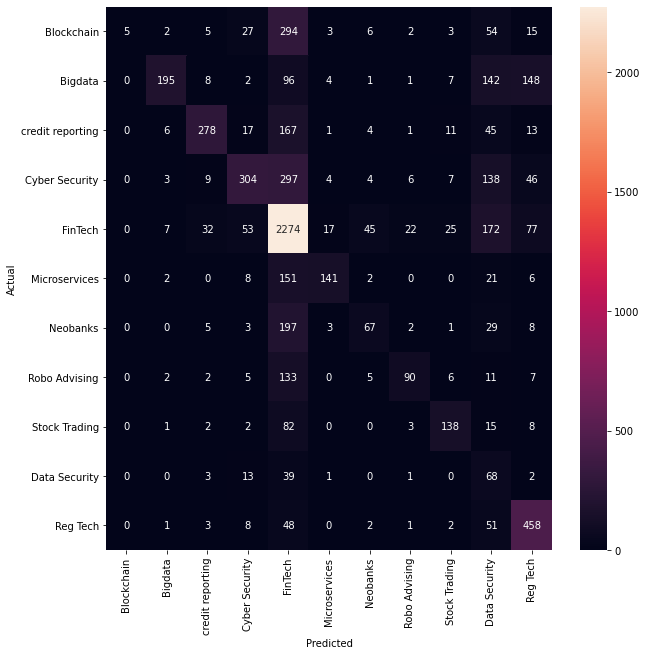

In [86]:
y_pred = history.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Target.values, yticklabels=category_id_df.Target.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [88]:
history.score(X_test,y_test)

0.5769672601952901